<a href="https://colab.research.google.com/github/Jared-Glenn/100-Days-of-Python/blob/main/Days%2076-100/077_film_budget_vs_revenue/077_Seaborn_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.isna().sum().sum()

0

In [17]:
data.isna().values.any()

False

In [6]:
data.duplicated().sum().sum()

0

In [18]:
data.duplicated().values.any()

False

In [7]:
data.describe()

,Rank
count,"5,391.00"
mean,"2,696.00"
std,"1,556.39"
min,1.00
25%,"1,348.50"
50%,"2,696.00"
75%,"4,043.50"
max,"5,391.00"


In [8]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

In [9]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [10]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace(',','')
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$','')
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(int)
data

<ipython-input-10-c6a11dfd214b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$','')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,"$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,385907,$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,"$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,"$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,245000,"$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,$0,$0
5387,126,12/18/2018,Aquaman,160000000,$0,$0
5388,96,12/31/2020,Singularity,175000000,$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,$0,$0


In [11]:
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace(',','')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$','')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(int)
data

<ipython-input-11-99b4360c98c7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$','')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,"$10,000,000"
1,5140,5/9/1916,Intolerance,385907,0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,"$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,"$3,000,000"
4,5222,1/1/1925,The Big Parade,245000,22000000,"$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,$0
5387,126,12/18/2018,Aquaman,160000000,0,$0
5388,96,12/31/2020,Singularity,175000000,0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,$0


In [12]:
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace(',','')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$','')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(int)
data

<ipython-input-12-328146e260f8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$','')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [13]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [14]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [16]:
data.sort_values('USD_Production_Budget', ascending=True)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
1209,5387,1999-02-04,Following,6000,240495,48482
...,...,...,...,...,...,...
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [22]:
zero_gross = data[data['USD_Domestic_Gross'] == 0]

In [23]:
zero_gross.sort_values('USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
...,...,...,...,...,...,...
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [25]:
zero_gross_ww = data[data['USD_Worldwide_Gross'] == 0]
zero_gross_ww

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [26]:
zero_gross_ww.sort_values('USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
...,...,...,...,...,...,...
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [32]:
print(data.query("`USD_Worldwide_Gross` != 0 and `USD_Domestic_Gross` == 0"))

      Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
157

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [33]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [42]:
data_clean = data[data['Release_Date'] < scrape_date]
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [43]:
data_clean['Gross Total'] = data_clean['USD_Worldwide_Gross'] - data_clean['USD_Production_Budget']
data_clean

<ipython-input-43-147e0c7906a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Gross Total'] = data_clean['USD_Worldwide_Gross'] - data_clean['USD_Production_Budget']


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross Total
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343


In [44]:
data_clean.sort_values('Gross Total')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross Total
5366,79,2017-07-21,Valerian and the City of a Thousand Planets,180000000,52573132,31023132,-127426868
4028,170,2011-11-03,Mars Needs Moms,150000000,39549758,21392758,-110450242
1608,317,2001-04-27,Town & Country,105000000,10364769,6712451,-94635231
1860,364,2002-08-16,The Adventures of Pluto Nash,100000000,7094995,4411102,-92905005
5341,432,2017-04-21,The Promise,90000000,10020889,8224288,-79979111
...,...,...,...,...,...,...,...
4844,59,2015-03-04,Furious 7,190000000,1516748684,351032910,1326748684
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010,1456640593
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,1752662225
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302,2007615668


In [45]:
data_clean_neg = data_clean[data_clean['Gross Total'] < 0]
data_clean_neg.sort_values('Gross Total')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross Total
5366,79,2017-07-21,Valerian and the City of a Thousand Planets,180000000,52573132,31023132,-127426868
4028,170,2011-11-03,Mars Needs Moms,150000000,39549758,21392758,-110450242
1608,317,2001-04-27,Town & Country,105000000,10364769,6712451,-94635231
1860,364,2002-08-16,The Adventures of Pluto Nash,100000000,7094995,4411102,-92905005
5341,432,2017-04-21,The Promise,90000000,10020889,8224288,-79979111
...,...,...,...,...,...,...,...
4084,5382,2012-01-13,Newlyweds,9000,4584,4584,-4416
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662
3503,5268,2009-11-09,The Horse Boy,160000,156612,156612,-3388
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,-1400


# Seaborn for Data Viz: Bubble Charts

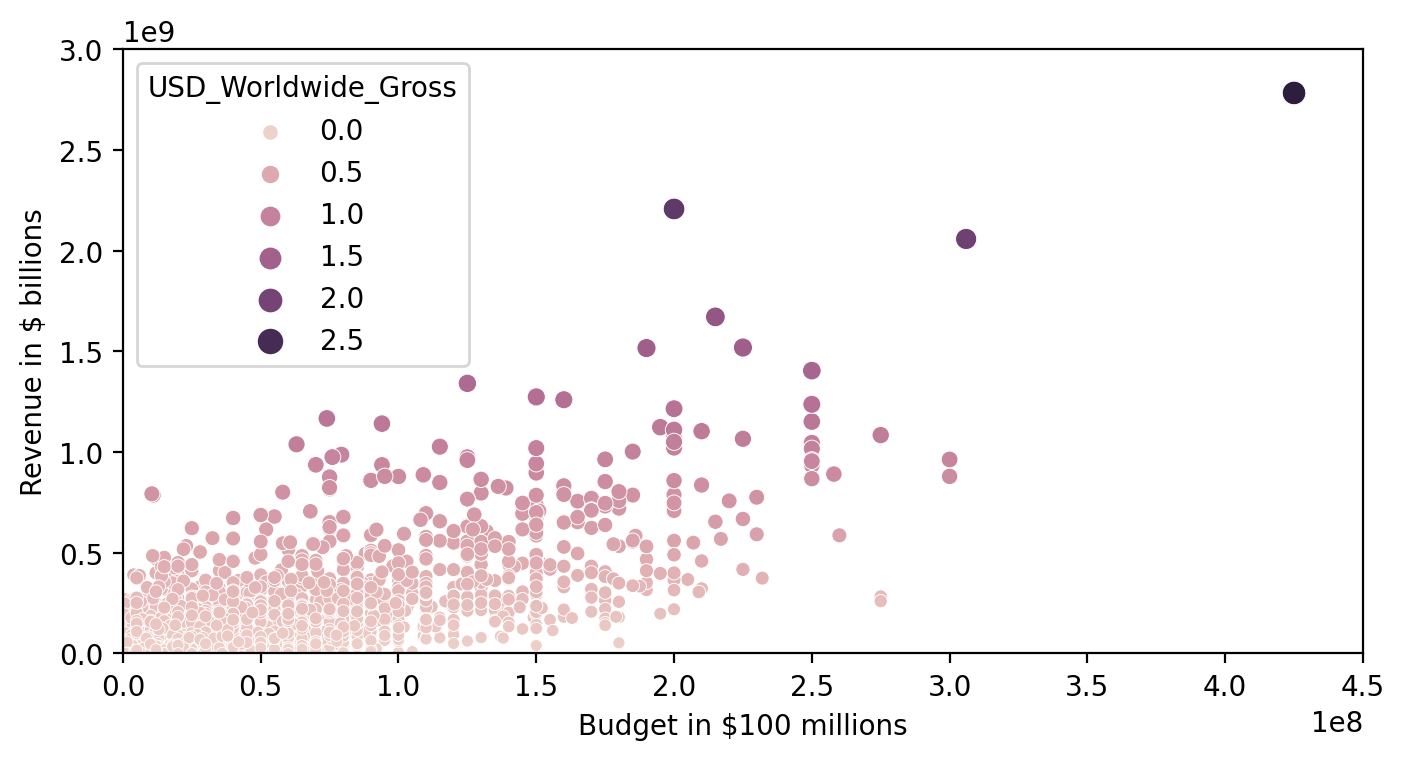

In [51]:
plt.figure(figsize=(8,4), dpi=200)
ax =sns.scatterplot(data=data_clean,
                    x='USD_Production_Budget',
                    y='USD_Worldwide_Gross',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

ax.set(ylim=(0,3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [50]:
data_clean.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross', 'Gross Total'],
      dtype='object')

In [58]:
data_clean['Year'] = pd.DatetimeIndex(data_clean['Release_Date']).year
data_clean = data_clean.drop('YEAR', axis=1)
data_clean

<ipython-input-58-41fb57e0c559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Year'] = pd.DatetimeIndex(data_clean['Release_Date']).year


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross Total,Year
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1915
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1916
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1916
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1925
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990,2017
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727,2017
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,2017
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343,2017


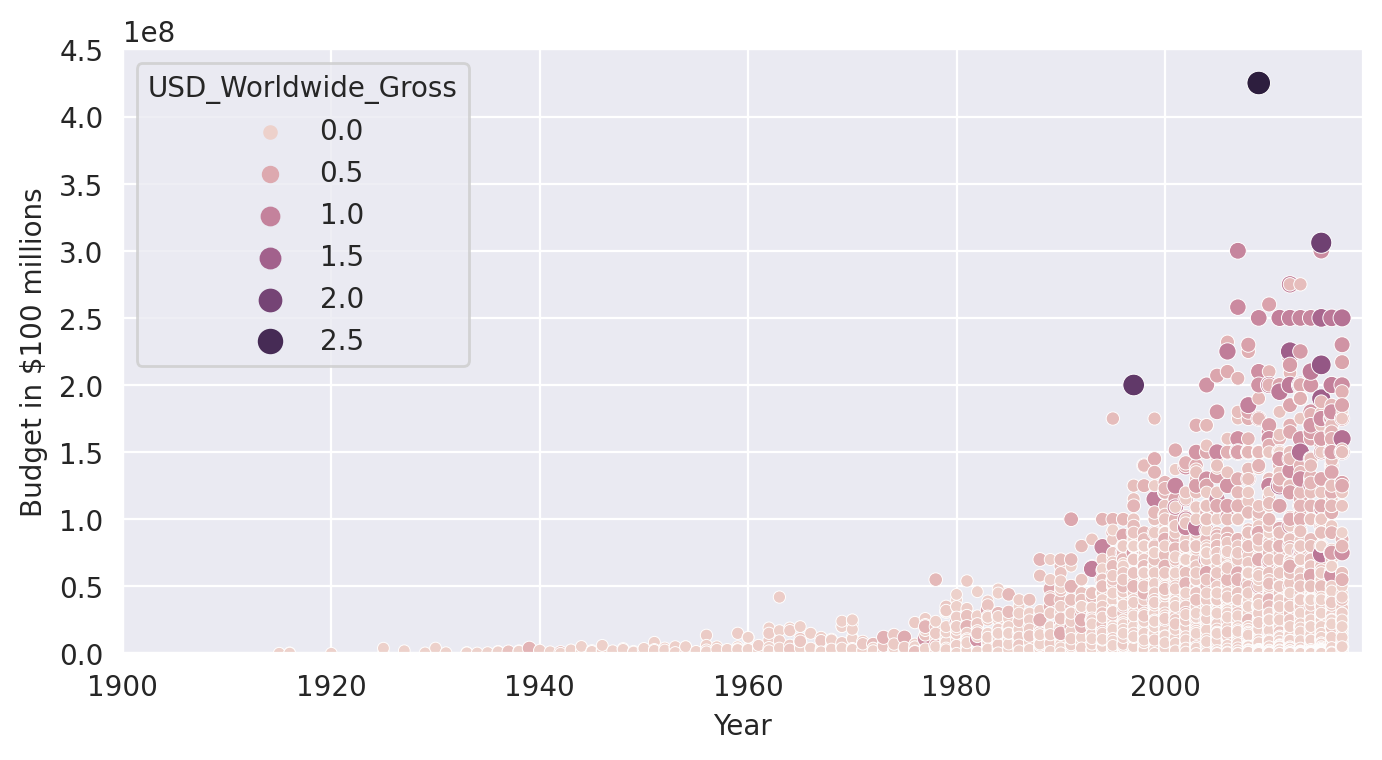

In [59]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax =sns.scatterplot(data=data_clean,
                    x='Year',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)


ax.set(ylim=(0,450000000),
       xlim=(1900, 2019),
       ylabel='Budget in $100 millions',
       xlabel='Year',)

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [61]:
data_clean['Decade'] = (data_clean['Year'] // 10) * 10
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross Total,Year,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1915,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1916,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1916,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1925,1920
...,...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990,2017,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727,2017,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,2017,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343,2017,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [62]:
old_films = data_clean[data_clean['Decade'] < 1970]
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross Total,Year,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1915,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1916,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1916,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1925,1920
...,...,...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,1969,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,96308900,1969,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1969,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,74000000,1969,1960


In [63]:
new_films = data_clean[data_clean['Decade'] >= 1970]
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross Total,Year,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,-25000000,1970,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,-17000000,1970,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,50500000,1970,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,-8800000,1970,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,78100000,1970,1970
...,...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990,2017,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727,2017,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,2017,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343,2017,2010


In [64]:
old_films.shape

(153, 9)

In [65]:
old_films.sort_values('USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Gross Total,Year,Decade
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920,1920
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1915,1910
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,29886000,1968,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,7866000,1942,1940
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,24800000,1969,1960
...,...,...,...,...,...,...,...,...,...
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,1969,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,1969,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,1965,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1969,1960


# Seaborn Regression Plots

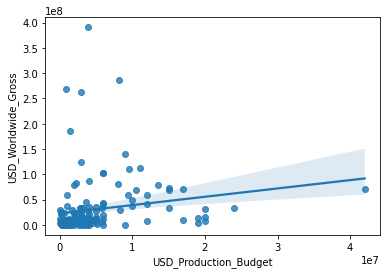

In [66]:
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

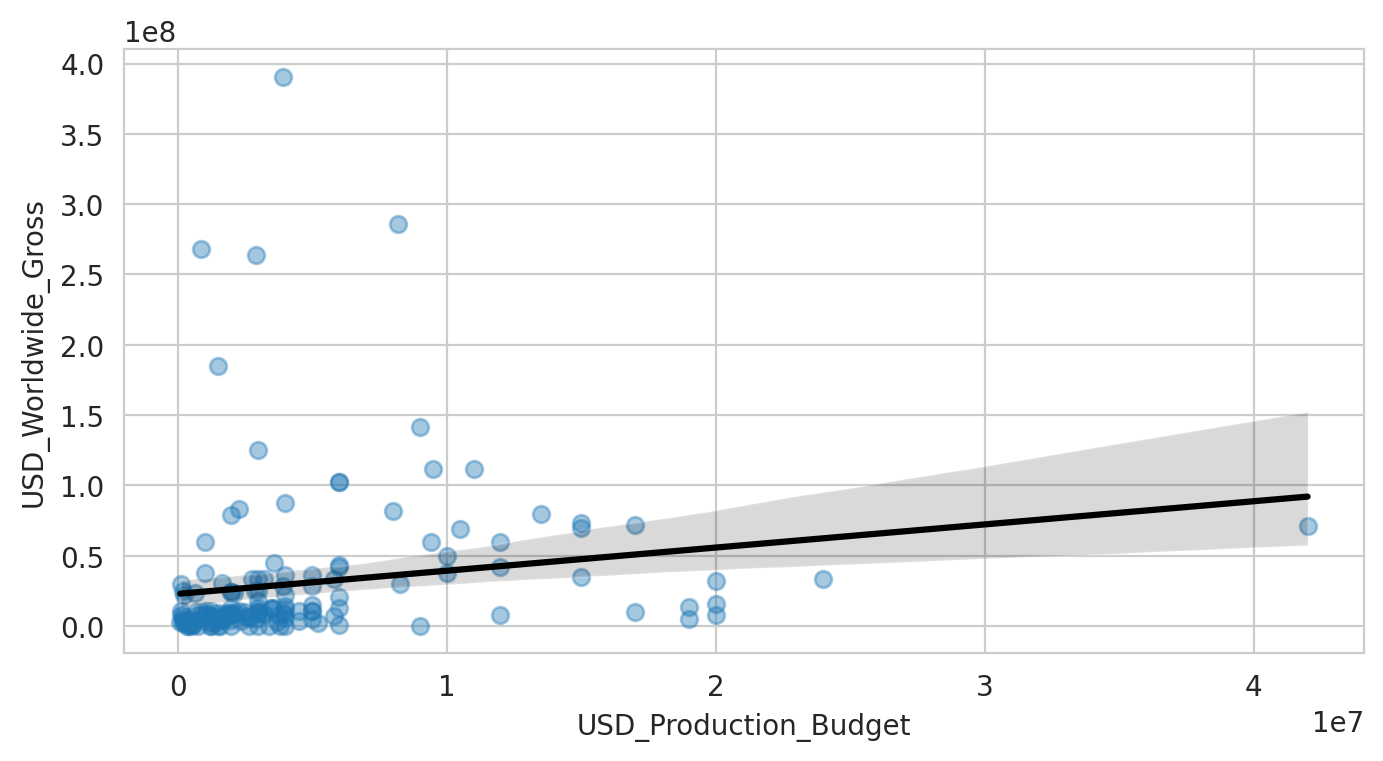

In [67]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  sns.regplot(data=old_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws = {'alpha': 0.4},
              line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

[(0.0, 3000000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 (0.0, 450000000.0),
 Text(0.5, 0, 'Budget in $100 millions')]

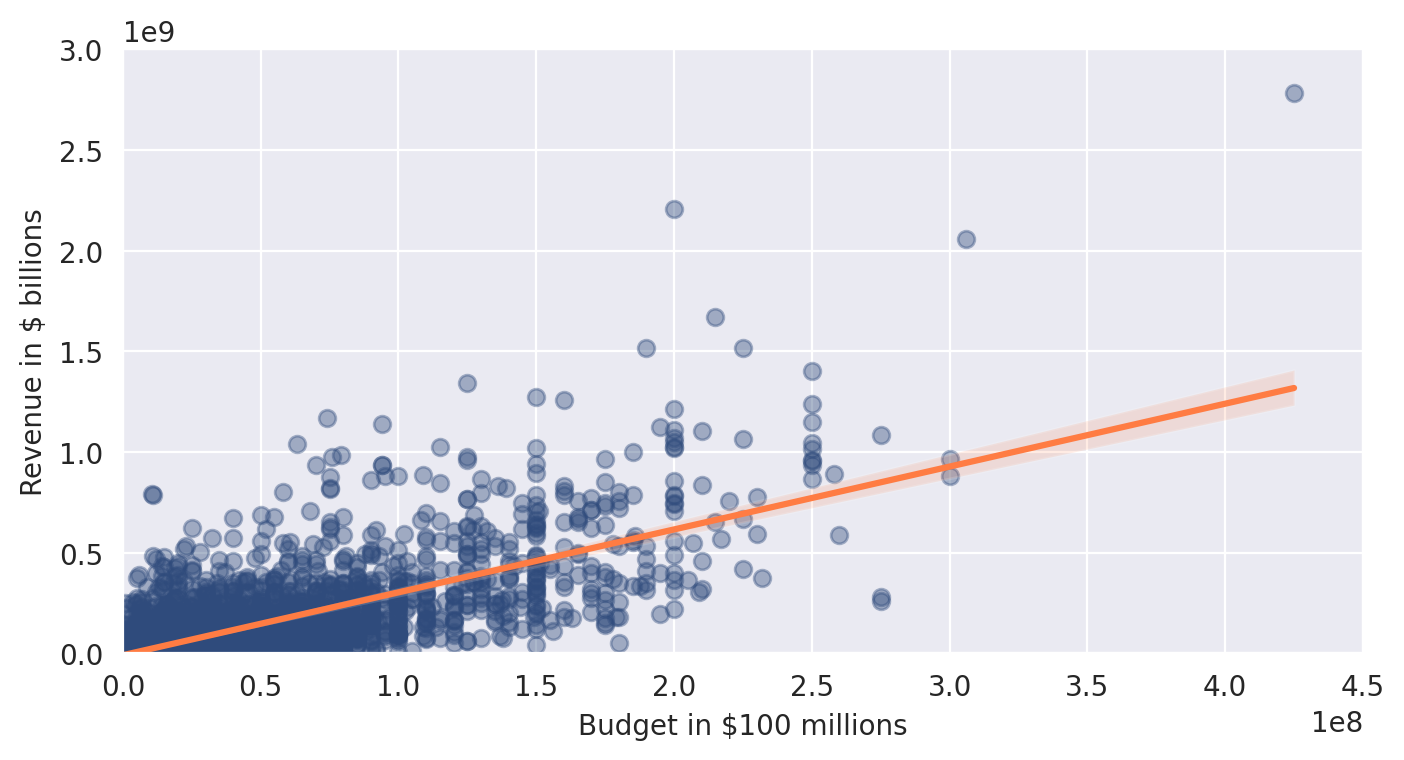

In [79]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws = {'alpha': 0.4, "color":"#2f4b7c" },
              line_kws = {'color': "#ff7c43"})
  
ax.set(ylim=(0,3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [82]:
regression = LinearRegression()
X = new_films[['USD_Production_Budget']]

y = new_films[['USD_Worldwide_Gross']]

In [83]:
regression.fit(X,y)

LinearRegression()

In [94]:
intercept =regression.intercept_

In [93]:
slope = regression.coef_

In [87]:
regression.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [88]:
regression_old = LinearRegression()
X = old_films[['USD_Production_Budget']]
y = old_films[['USD_Worldwide_Gross']]

In [89]:
regression_old.fit(X, y)

LinearRegression()

In [96]:
slope_old = regression_old.coef_

In [97]:
intercept_old = regression_old.intercept_

In [92]:
regression_old.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [95]:
revenue = (slope*(350000000)) + intercept
revenue

array([[1.0842578e+09]])

In [98]:
revenue_old = (slope_old*(350000000)) + intercept_old
revenue_old

array([[5.99521139e+08]])

In [107]:
revenue_old = round(revenue_old[0][0], -6)

In [108]:
 revenue_old

600000000.0